<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Installing and Importing necessary libraries

In [5]:
# Installing the required python libraries
!pip install tensorflow==2.17.0 scikit-learn==1.3.1 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.25.2 pandas==2.2.2 imbalanced-learn==0.10.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
# Import the required libraries numerical and plotting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# import model libraries
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# import metric libraries
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score


import time  # Module for time-related operations.
import random
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [7]:
# load the churn.csv file

df = pd.read_csv('Churn.csv')


## Data Overview

In [8]:
# Shape of the dataset
df.shape

(10000, 14)

In [9]:
# Information about the dataset
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# view the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [12]:
# statiscal summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [14]:


# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


In [15]:
# find unique values
df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


## RowNumber and CustomerId are unique items

In [16]:
# Delete unique columns
df = df.drop(['RowNumber', 'CustomerId'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [17]:
# Surname is an identifier so removing it as it does not have any impact on the data
df = df.drop('Surname', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [18]:
# Find the unique values of all the categorical variables

discrete_columns = ['Gender','Geography', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

for column in discrete_columns:
  print(f"Unique values for {column}: {df[column].unique()}")

Unique values for Gender: ['Female' 'Male']
Unique values for Geography: ['France' 'Spain' 'Germany']
Unique values for Tenure: [ 2  1  8  7  4  6  3 10  5  9  0]
Unique values for NumOfProducts: [1 3 2 4]
Unique values for HasCrCard: [1 0]
Unique values for IsActiveMember: [1 0]
Unique values for Exited: [1 0]


In [19]:
# Find the value count percentage

value_counts_percentage = df['Exited'].value_counts(normalize=True) * 100
value_counts_percentage

,proportion
Exited,
0,79.63
1,20.37


## Observations

- There are 10000 rows in the dataset.
- There are no null values.
- The target data is not normalized, with 79.63% of existing bank customer and 20.37% of left customers.
- There are few categorical variables, may need conversion to numerical based on EDA.

## Exploratory Data Analysis

### Univariate Analysis

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

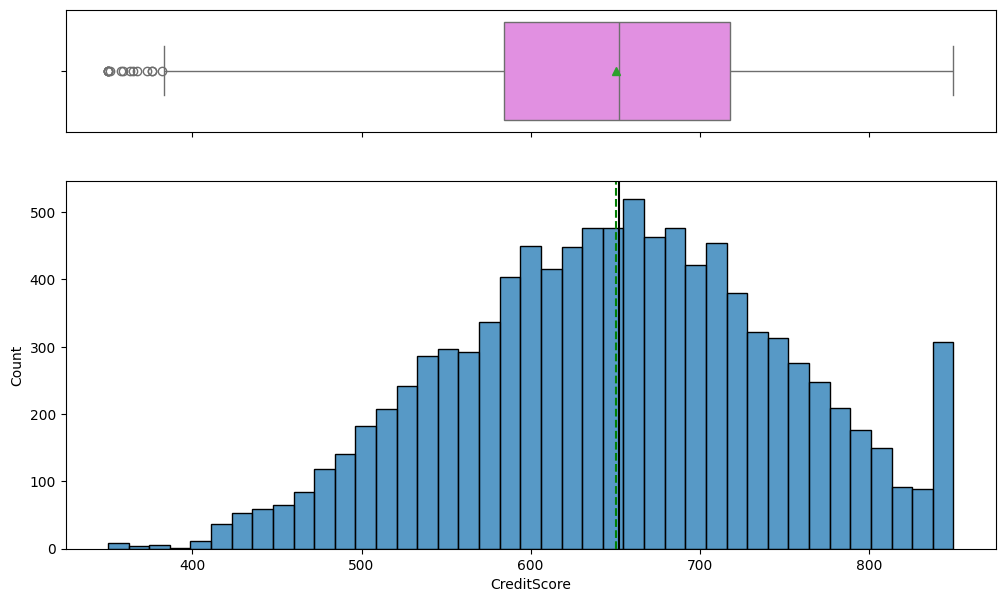

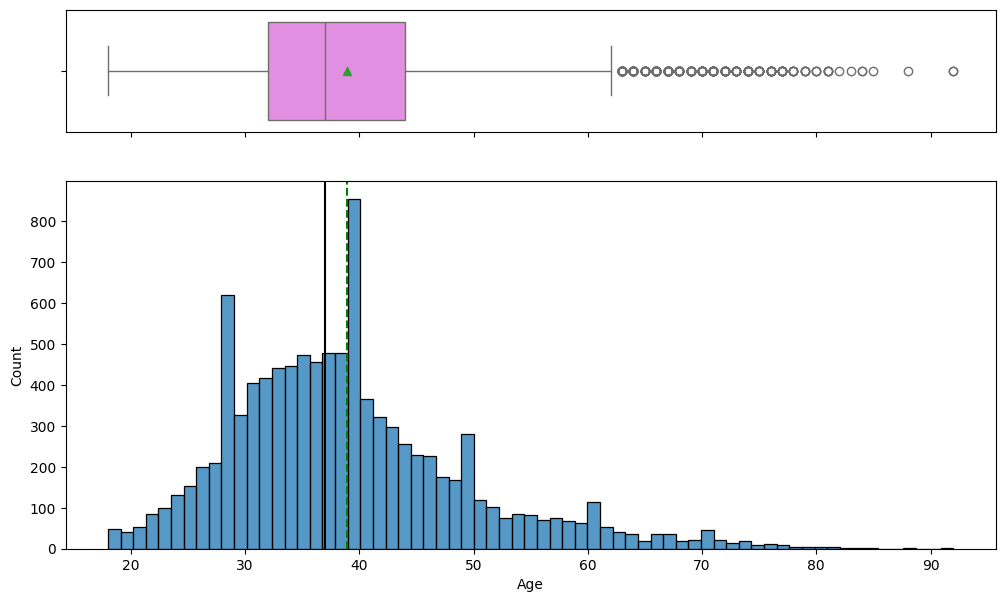

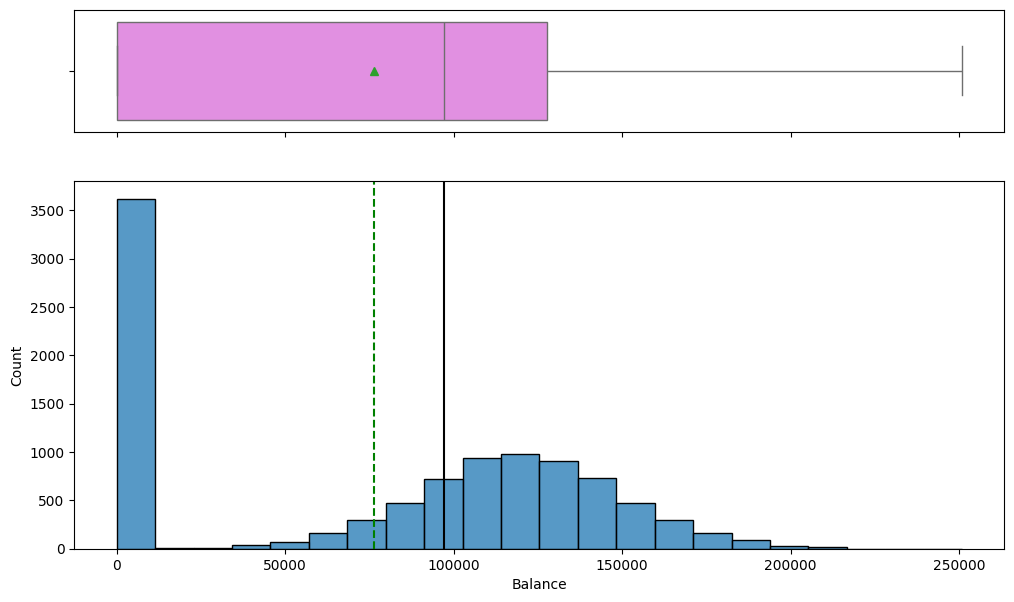

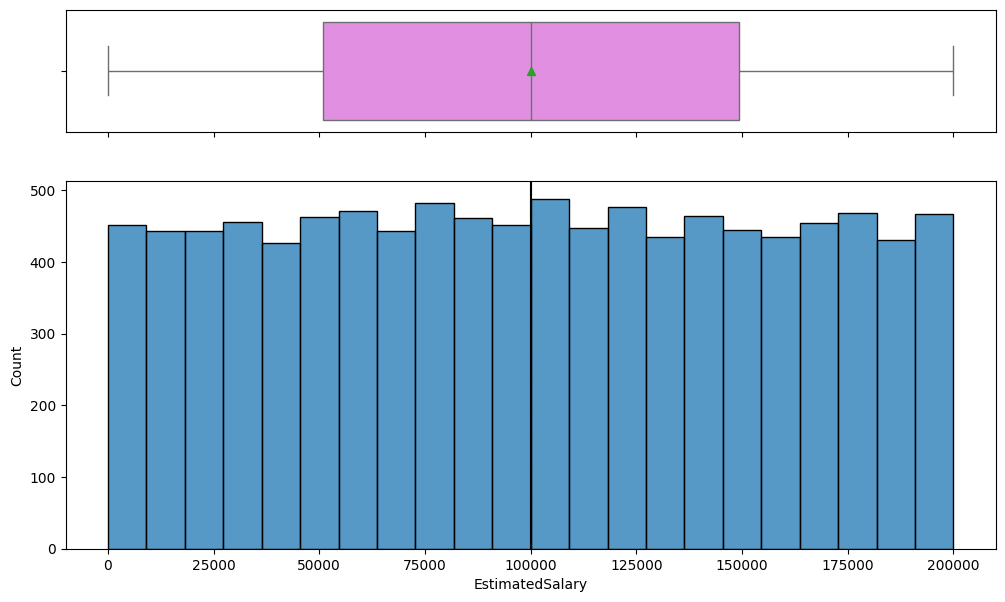

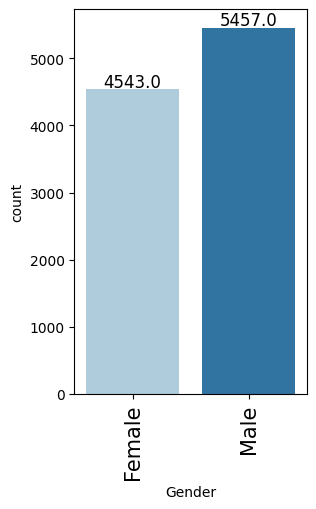

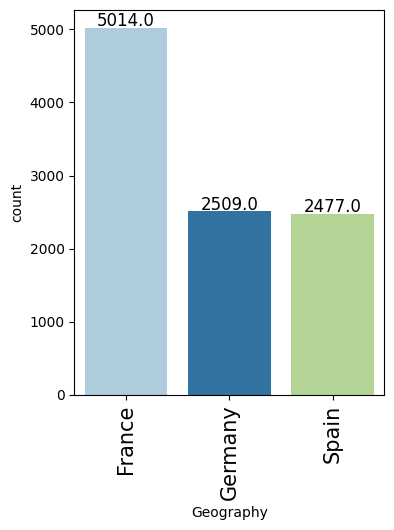

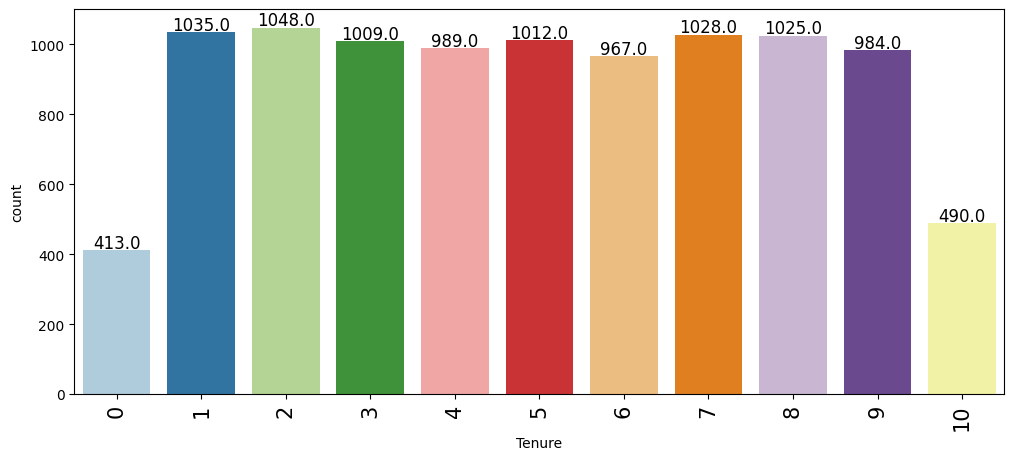

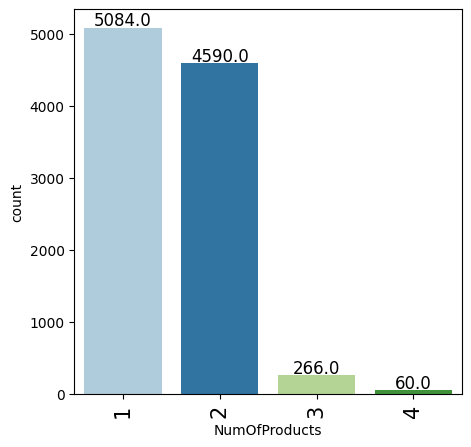

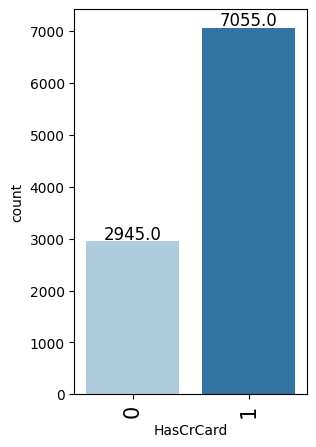

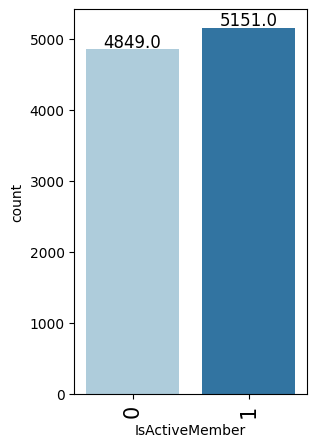

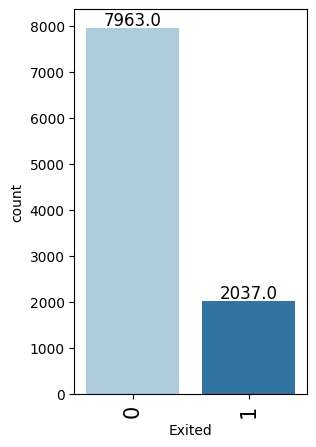

In [24]:
# univariate analysis using above functions

continuous_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for column in continuous_columns:
  histogram_boxplot(df, column)

discrete_columns = ['Gender','Geography', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
for column in discrete_columns:
  labeled_barplot(df, column)


## Observations
- CreditScore is normally distributed with a few outliers, I do not see anything wrong with the outliers, so I will leave them as is.
- Age is right skewed with no outliers.
- Balance is a little right skewed but nothing to be processed.
- Estimated salary is normally distributed.
- There are lot of customers from France than Germany and Spain.
- Most of the customers have 1 or 2 products and very few with 3 or 4 products.
- Most of the customers have credit card.
- We will dig more how each feature is attributing to the label.

### Bivariate Analysis

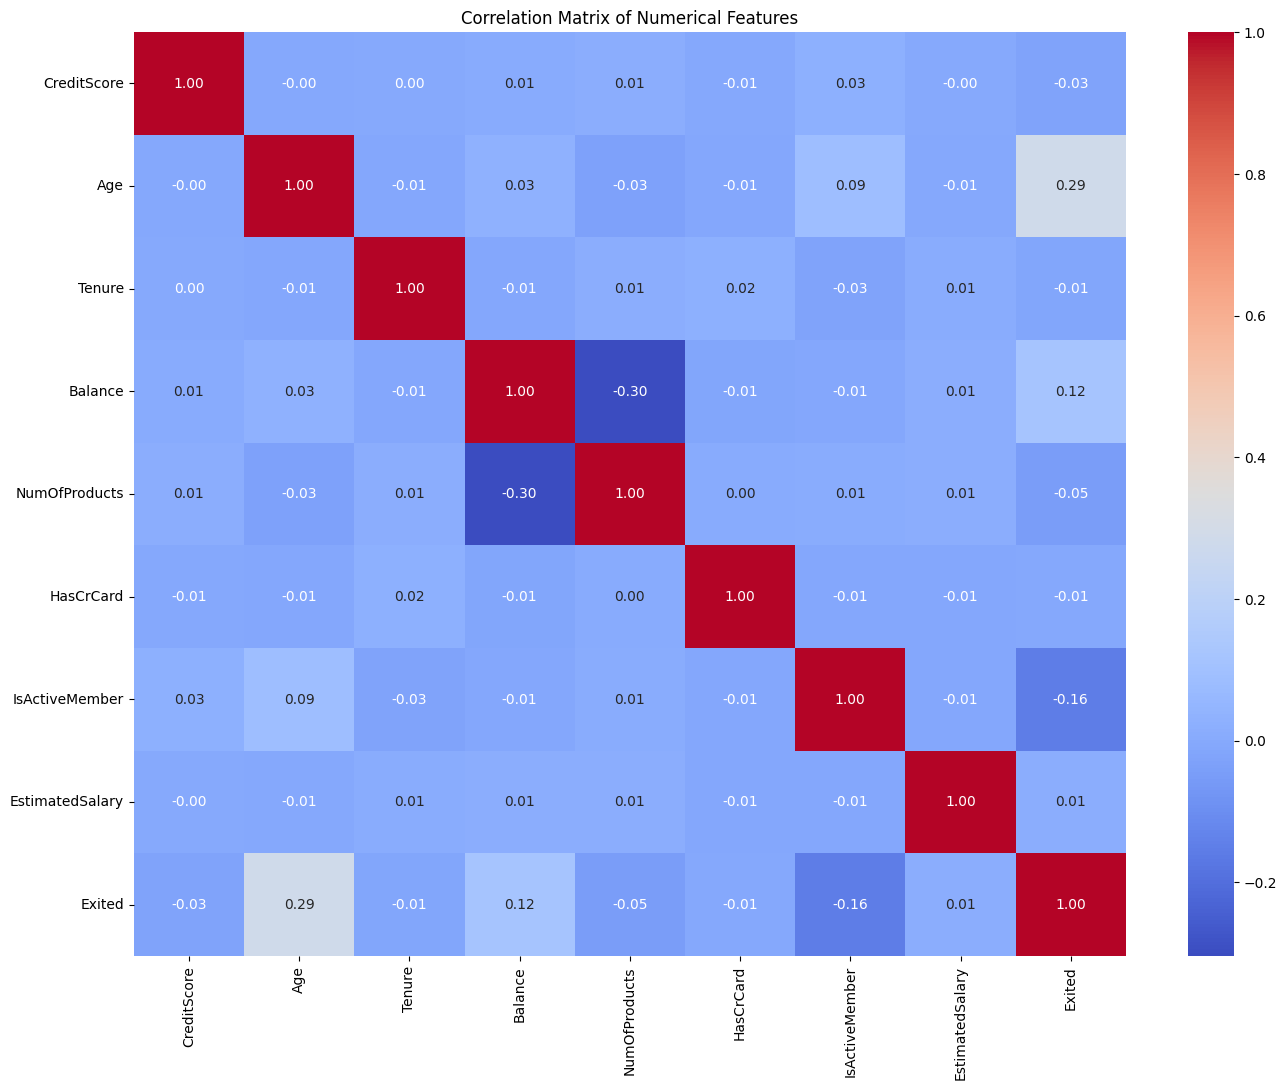

In [25]:
# Select only numerical columns for the heatmap
numerical_data = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Observations

- There is no very strong correlation between any of the features
- Balance has good negative correlation with Num of Products with -0.30
- Age has good positive correlation with Exited(target variable) with 0.29
- IsActiveMember has good negative correlation with Exited(target variable) with -0.16
- Balance has good positive correlation with Exited(target variable) with 0.12


Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


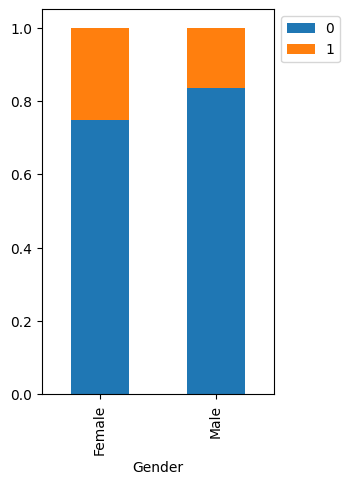

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


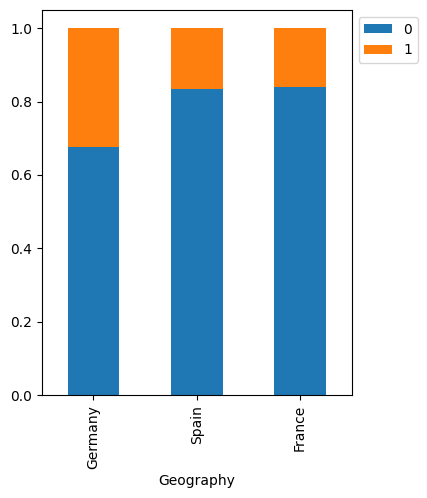

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


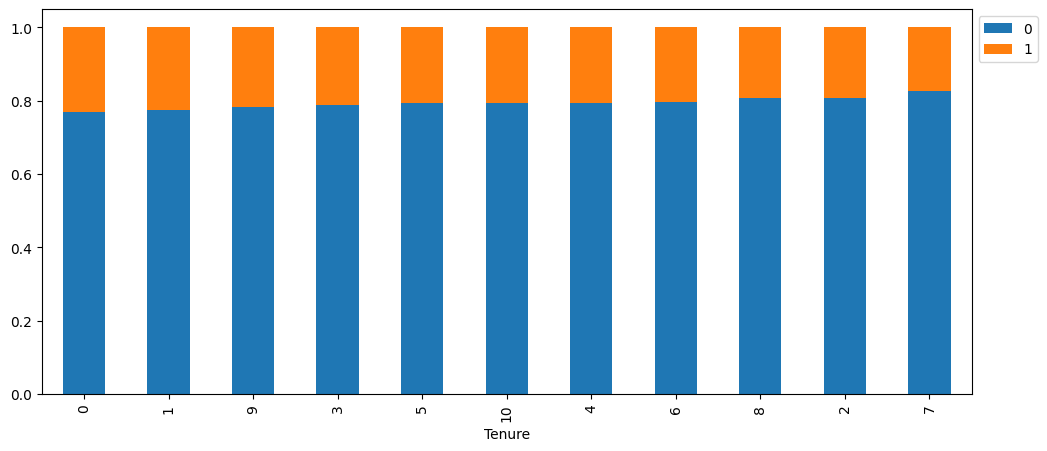

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


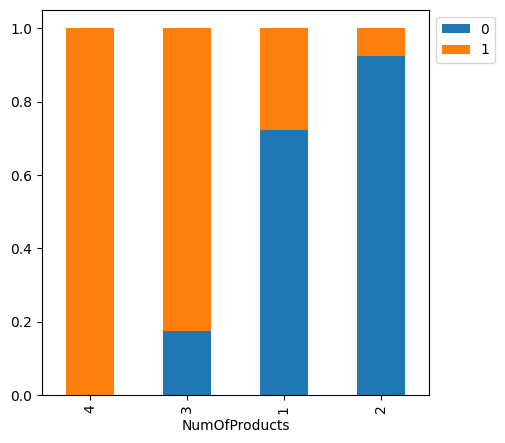

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


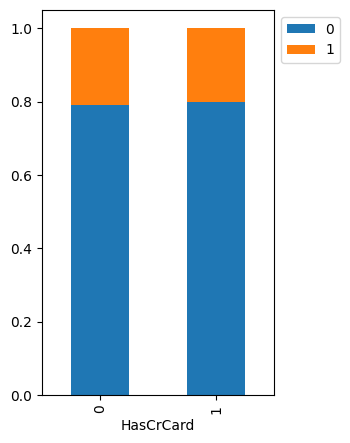

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


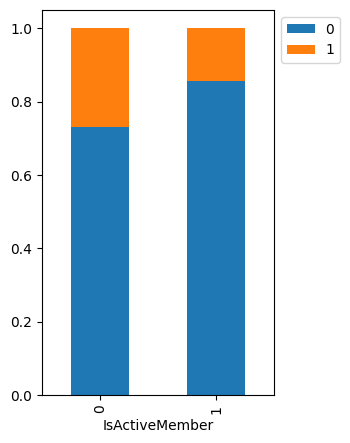

Exited     0     1    All
Exited                   
1          0  2037   2037
All     7963  2037  10000
0       7963     0   7963
------------------------------------------------------------------------------------------------------------------------


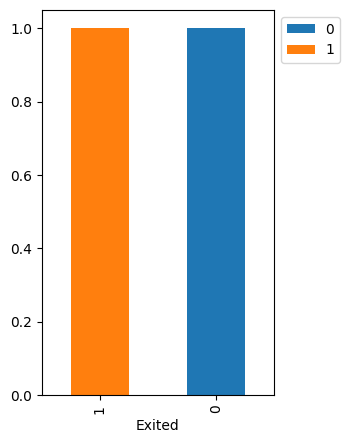

In [26]:
# plot stacked_barplot using the above function for all valid columns

for column in discrete_columns:
  stacked_barplot(df, column, 'Exited')

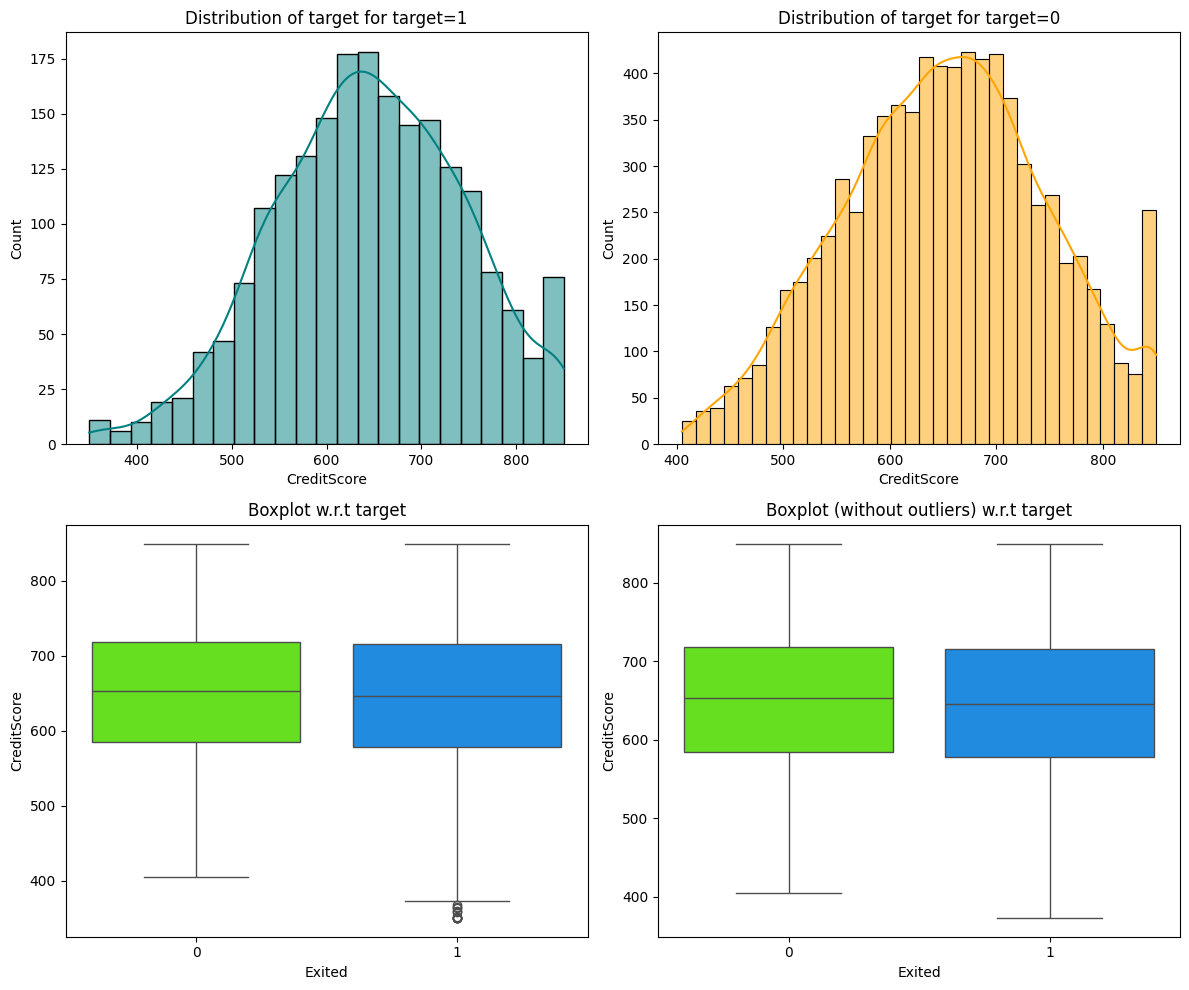

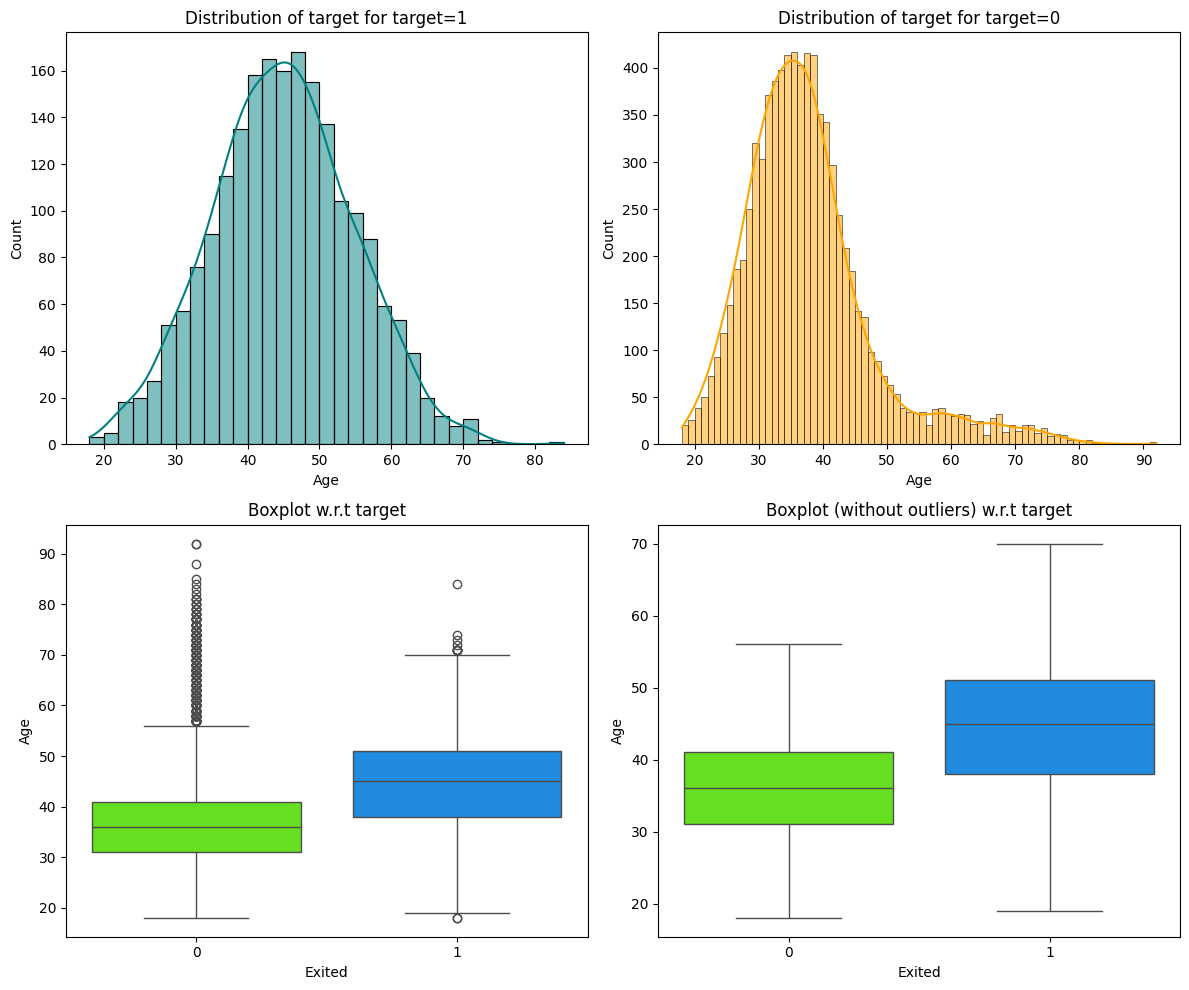

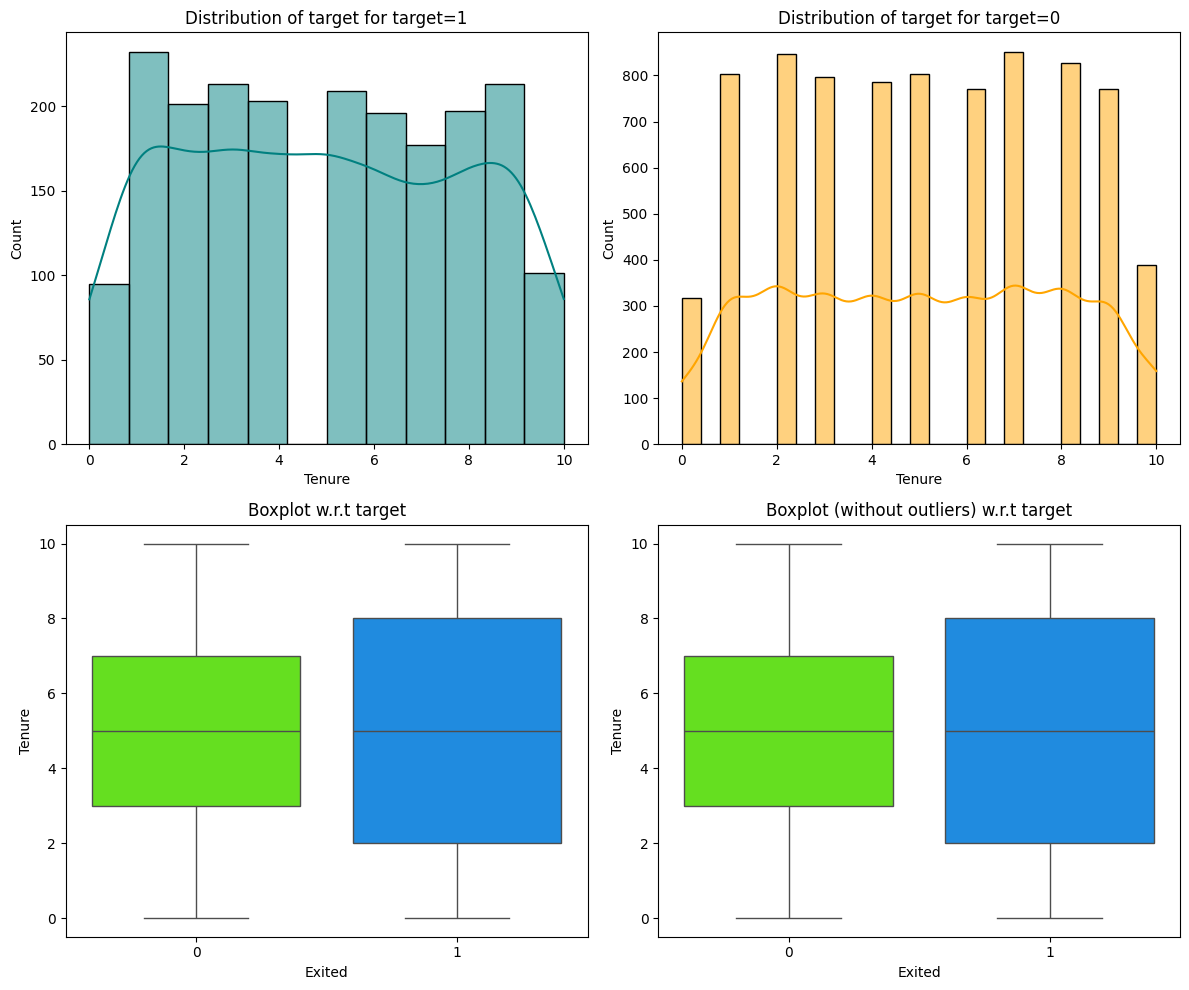

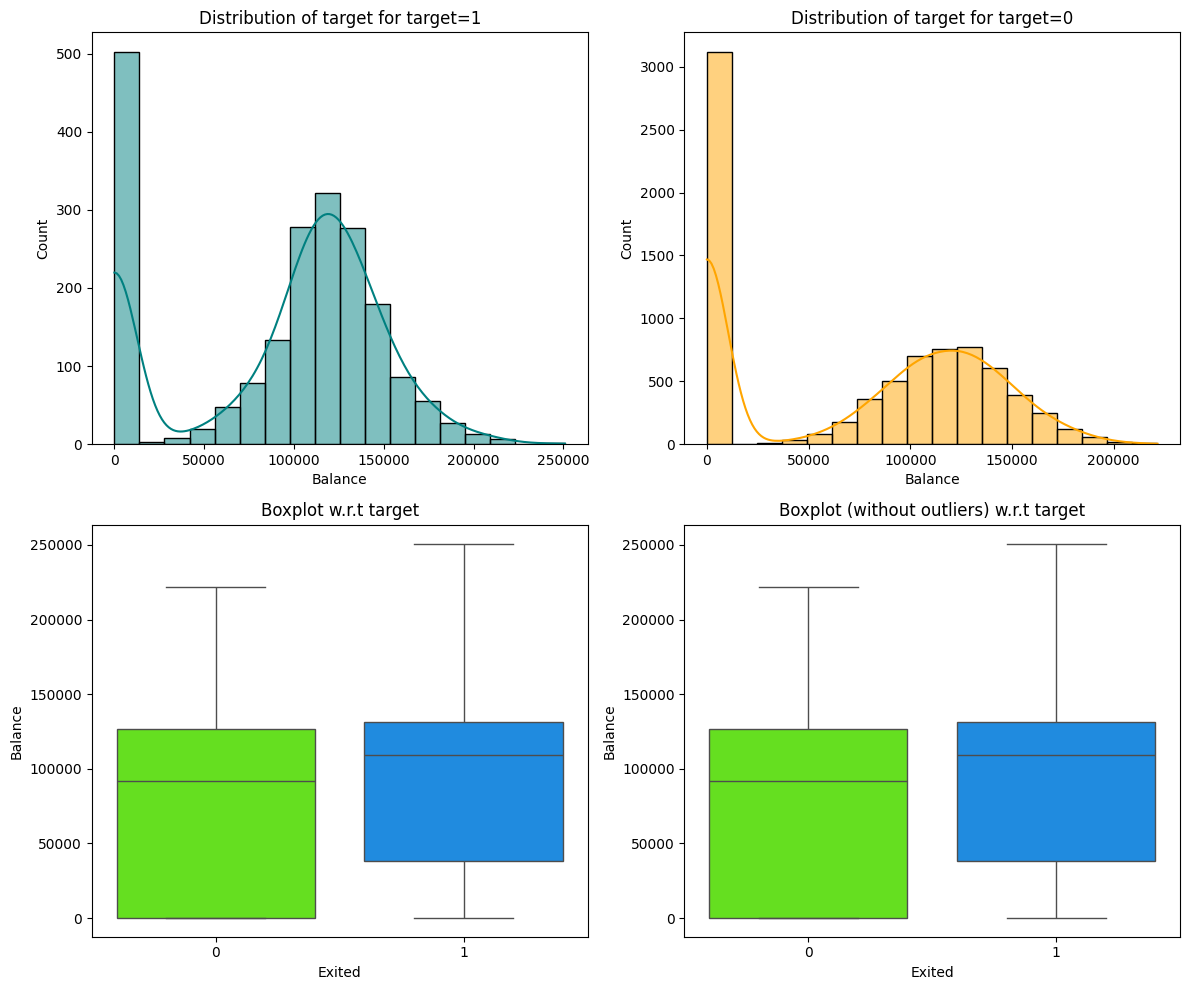

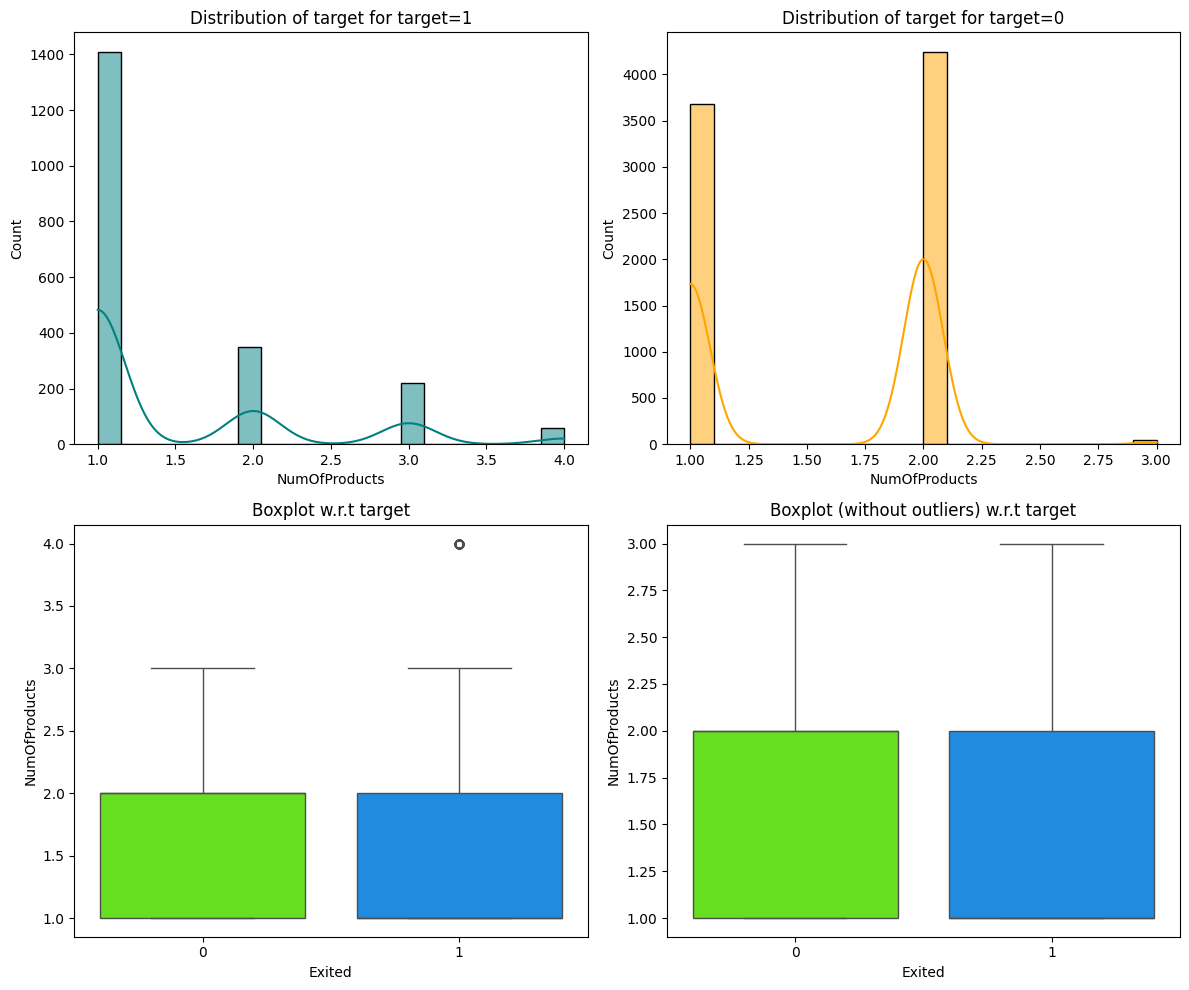

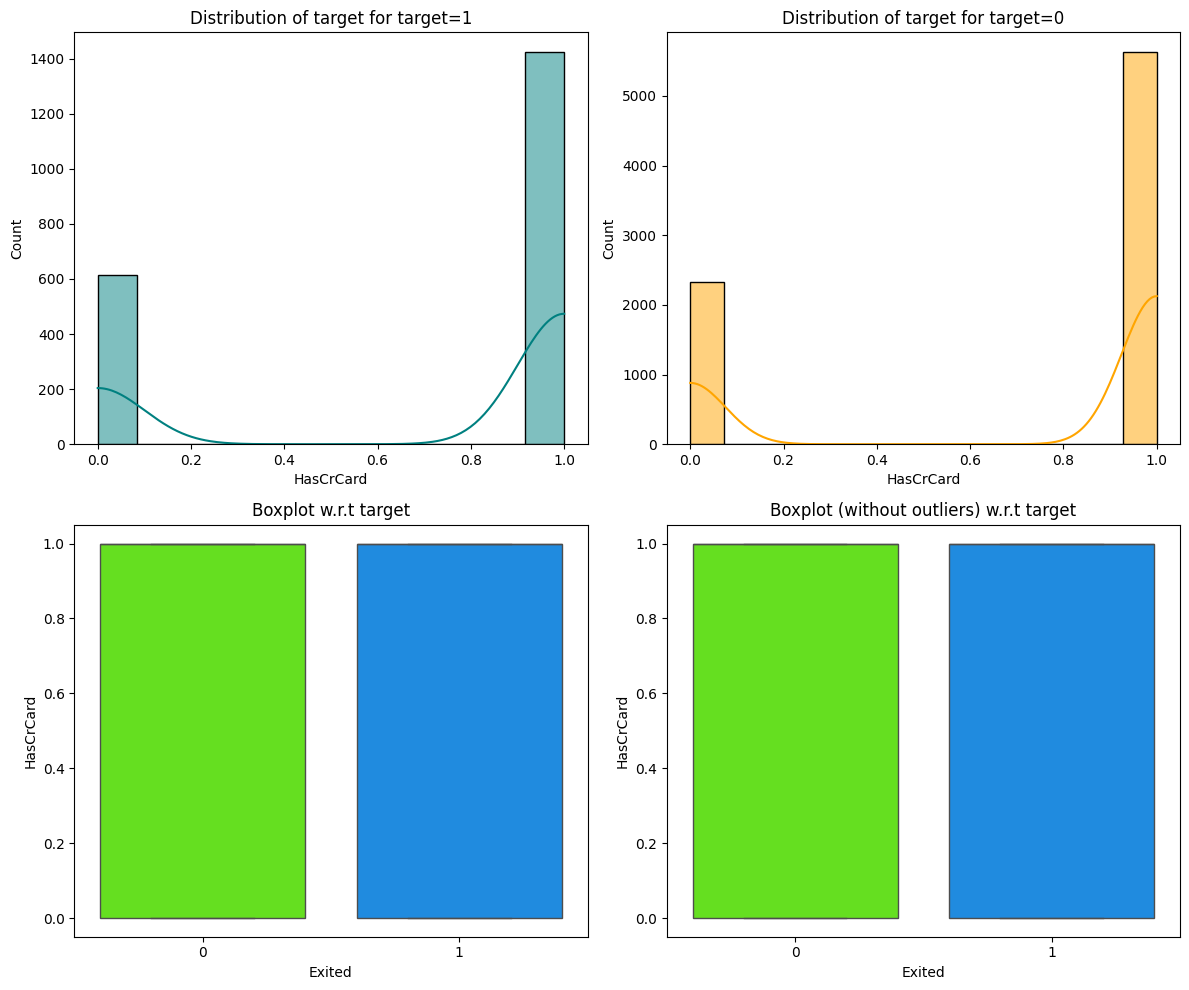

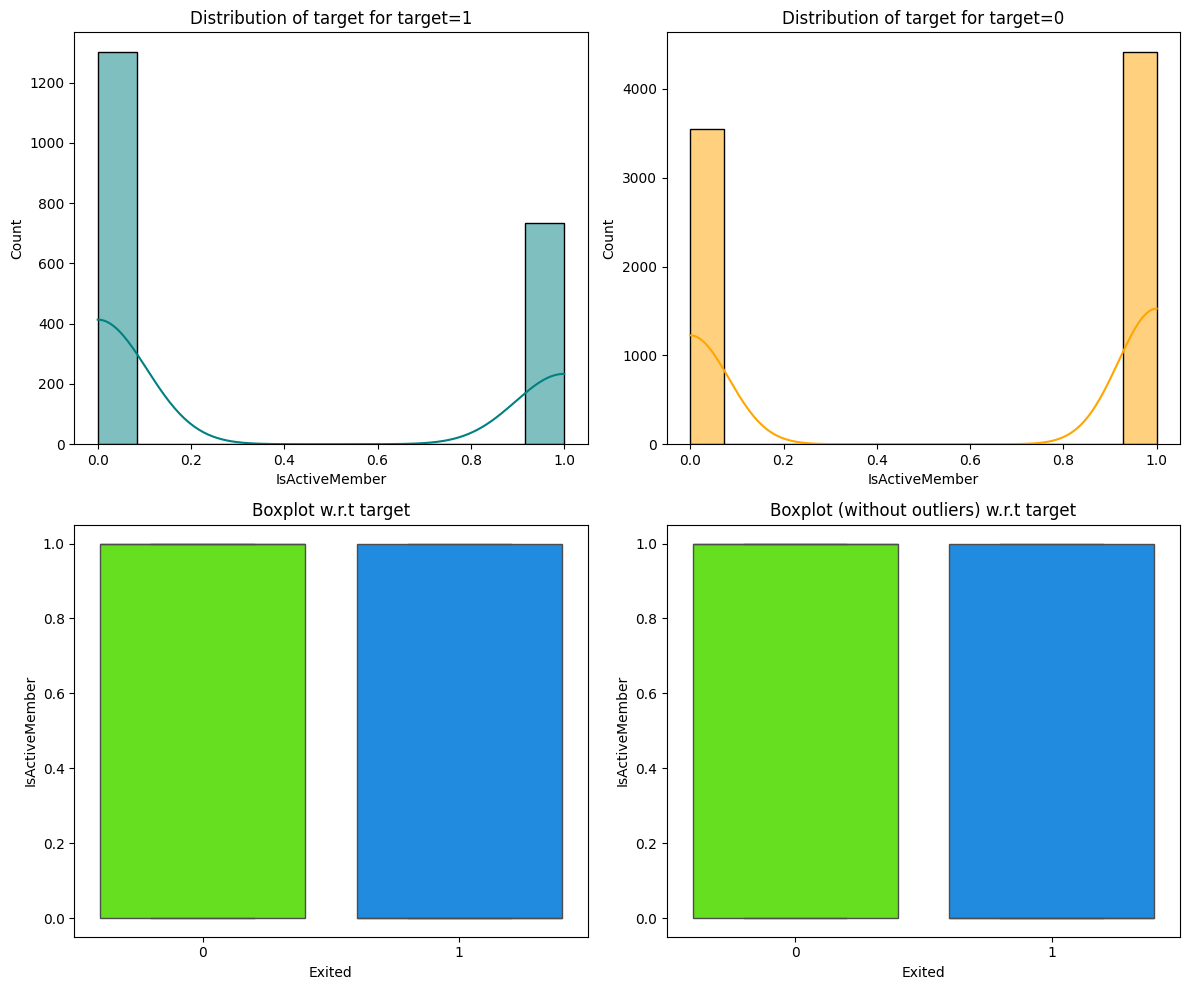

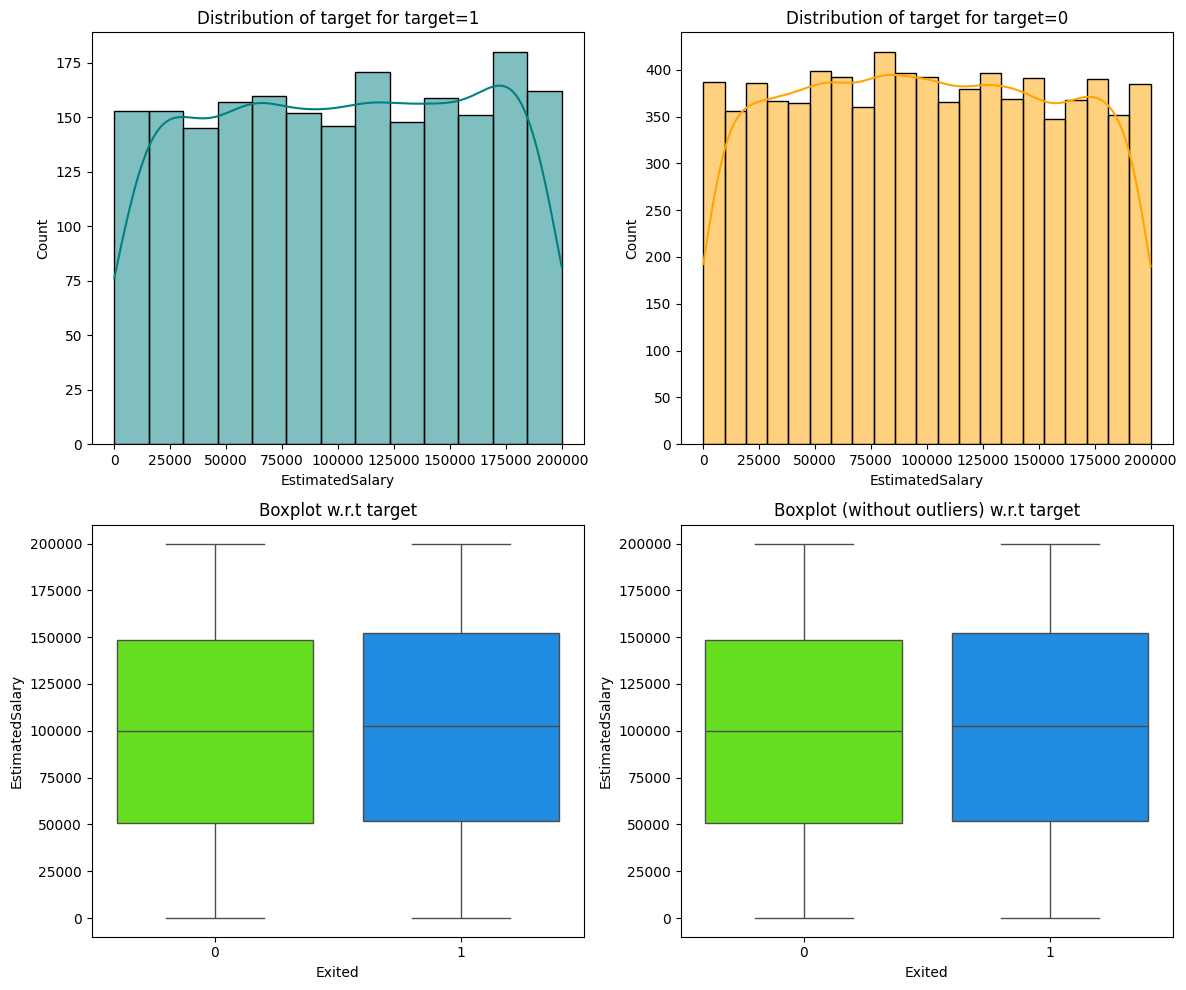

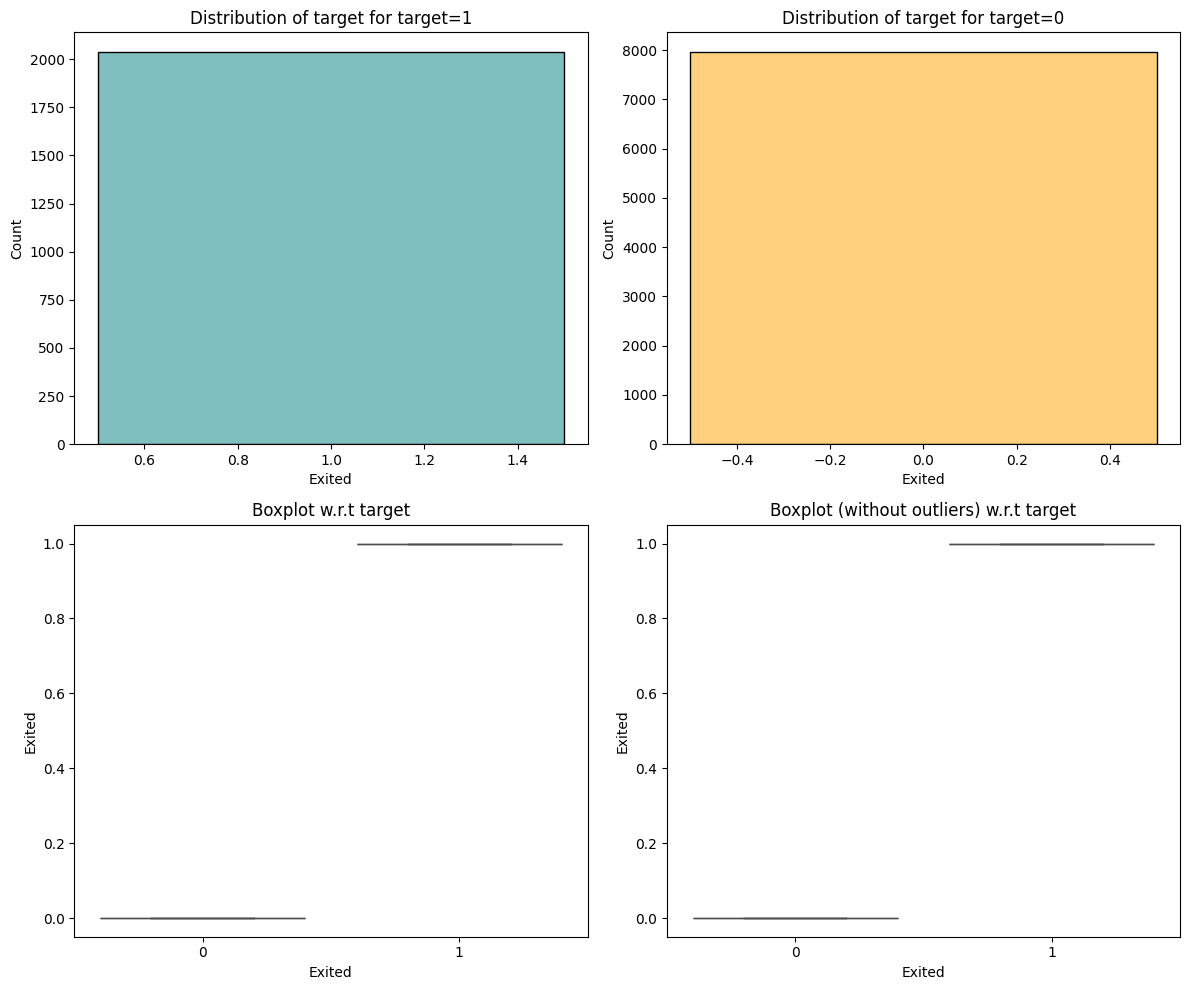

In [27]:
# Plot distribution_plot_wrt_target using the above function for all valid columns

for column in numerical_data:
  distribution_plot_wrt_target(df, column, 'Exited')

# Observations

  - CreditScore is distributed equally for both exited and non-exited customers.
  - As the age increases customers are more un likely to exit.
  - As balance increase customers are less likely to exit.
  - If the customer is active, less likely to exit.

## Data Preprocessing

### Dummy Variable Creation

In [28]:
df = pd.get_dummies(df,columns=df.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
df = df.astype(float)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [29]:
# drop and remove the target variable
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [32]:
# Split the data into the training and testing set

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y,shuffle = True)

print("X_large shape:", X_large.shape)
print("y_large shape:", y_large.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


# Further splitting the training dataset into the training and validation set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size=0.2, stratify=y_large, random_state=1)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_large shape: (8000, 11)
y_large shape: (8000,)
X_test shape: (2000, 11)
y_test shape: (2000,)
X_train shape: (6400, 11)
y_train shape: (6400,)
X_val shape: (1600, 11)
y_val shape: (1600,)


### Data Normalization

In [34]:
# creating an instance of the standard scaler to normalize the numerical values with different scale
sc = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_val[num_cols] = sc.fit_transform(X_val[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,6400.0,1.110223e-18,1.000078,-3.102942,-0.690782,0.020496,0.690540,2.051246
Age,6400.0,8.881784e-18,1.000078,-2.002040,-0.663852,-0.185927,0.483167,5.071240
Tenure,6400.0,3.330669e-17,1.000078,-1.740107,-0.703397,-0.012257,1.024453,1.715594
Balance,6400.0,-2.317591e-17,1.000078,-1.222641,-1.222641,0.331874,0.822561,2.599975
NumOfProducts,6400.0,1.531875e+00,0.582000,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,6400.0,7.120313e-01,0.452852,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,6400.0,5.110938e-01,0.499916,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,6400.0,-2.858824e-17,1.000078,-1.738925,-0.858823,-0.004862,0.850301,1.747521
Geography_Germany,6400.0,2.503125e-01,0.433227,0.000000,0.000000,0.000000,1.000000,1.000000
Geography_Spain,6400.0,2.539062e-01,0.435279,0.000000,0.000000,0.000000,1.000000,1.000000


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


In [35]:
# create a function for plotting the confusion matrix
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [36]:
# create a function for plotting the metrics
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

    plt.xlabel("Predicted label")

# Dataframes to store the recall values
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [37]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
# Fix the seed to achieve consistency
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

#Initialize the neural network
model = Sequential()
# Adding the input layer with 128 neurons and relu as activation function
model.add(Dense(128, activation='relu', input_dim = X_train.shape[1]))
# Adding a hidden layer with 32 neurons and relu activation function
model.add(Dense(64, activation='tanh'))
# Adding the output layer with 1 neuron and sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

In [38]:
# Use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)
metric = keras.metrics.Recall()

In [39]:
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [40]:
# Print the summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
start = time.time()
# Fit the model with appropriate batch size and epochs
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))
end=time.time()

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4167 - recall: 0.2616 - val_loss: 0.4045 - val_recall: 0.2515
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4165 - recall: 0.2616 - val_loss: 0.4044 - val_recall: 0.2515
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4164 - recall: 0.2614 - val_loss: 0.4043 - val_recall: 0.2485
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4163 - recall: 0.2623 - val_loss: 0.4042 - val_recall: 0.2485
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4161 - recall: 0.2623 - val_loss: 0.4041 - val_recall: 0.2485
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4160 - recall: 0.2636 - val_loss: 0.4040 - val_recall: 0.2485
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4158 - recall: 0.2638 - val_loss: 0.4039 - val_recall: 0.2485
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4157 - recall: 0.2664 - val_loss: 0.4038 - val_recall: 0.2485


Time taken in seconds  61.81574487686157


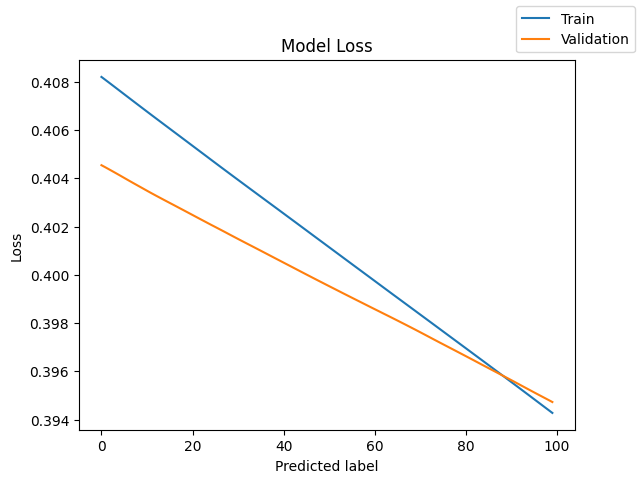

In [47]:
print("Time taken in seconds ",end-start)
plot(history,'loss')

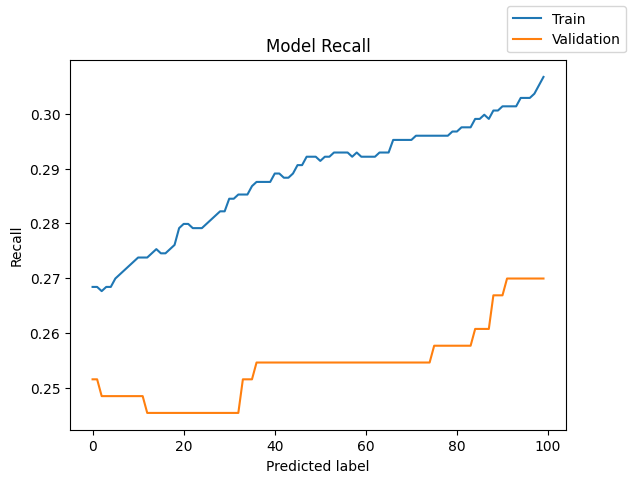

In [48]:
#Plotting recall of trainn set vs recall of validation set
plot(history,'recall')

In [49]:
#Predicting the results using best as a threshold
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [50]:
#Predicting the results using best as a threshold
y_val_pred = model.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [51]:
# Add the metrics to the dataframe created earlier

model_name = "NeuralNetwork with SGD optimizer"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [52]:
#Classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      5096
         1.0       0.73      0.30      0.42      1304

    accuracy                           0.83      6400
   macro avg       0.79      0.64      0.66      6400
weighted avg       0.82      0.83      0.81      6400



In [53]:
#Classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      1274
         1.0       0.70      0.27      0.39       326

    accuracy                           0.83      1600
   macro avg       0.77      0.62      0.65      1600
weighted avg       0.81      0.83      0.80      1600



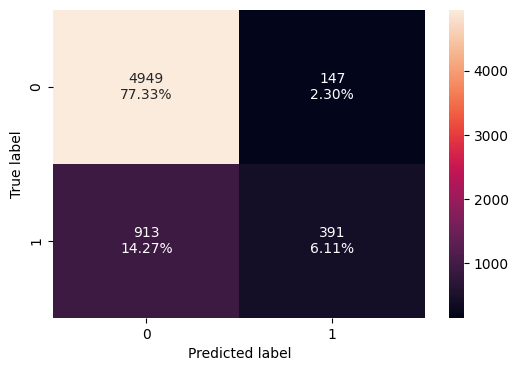

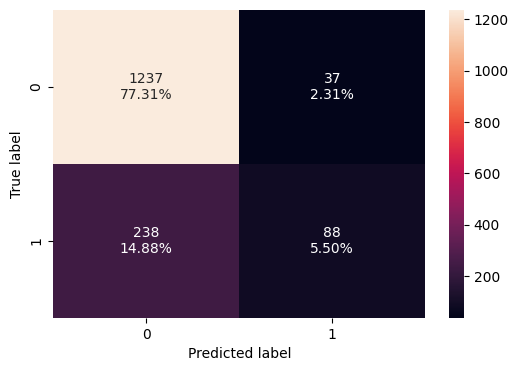

In [54]:
make_confusion_matrix(y_train, y_train_pred)
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [75]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [76]:
#Initializing the neural network
model1 = Sequential()
#Add an input layer
model1.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
#Add a hidden layer (specify the # of neurons and activation function)
model1.add(Dense(32,activation='relu'))
#Add a output layer with the required number of neurons and relu as activation function
model1.add(Dense(1, activation = 'sigmoid'))

In [77]:
optimizer = tf.keras.optimizers.Adam()
metric = keras.metrics.Recall() #using recall as the metric
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

# Print the summary
model1.summary()

start = time.time()
# Fit the model with appropriate batch size and epochs
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))
end=time.time()
print("Time taken in seconds ",end-start)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,697 (22.25 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.5301 - recall: 0.0238 - val_loss: 0.4325 - val_recall: 0.0890
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4420 - recall: 0.1452 - val_loss: 0.4139 - val_recall: 0.1840
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4256 - recall: 0.2270 - val_loss: 0.4078 - val_recall: 0.2607
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4170 - recall: 0.2632 - val_loss: 0.4035 - val_recall: 0.2853
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4094 - recall: 0.2893 - val_loss: 0.3990 - val_recall: 0.2975
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4020 - recall: 0.3224 - val_loss: 0.3948 - val_recall: 0.3160
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3947 - recall: 0.3378 - val_loss: 0.3901 - val_recall: 0.3252
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3875 - recall: 0.3502 - val_loss: 0.3847 - val_recall: 0.3497
Epoch 9/10
50/50 ━━━━━━

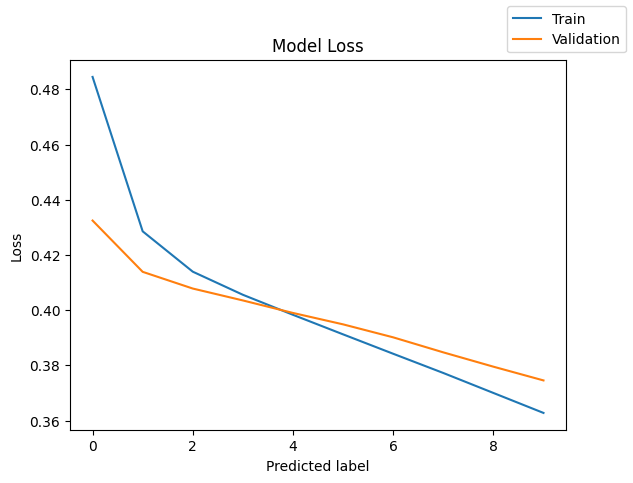

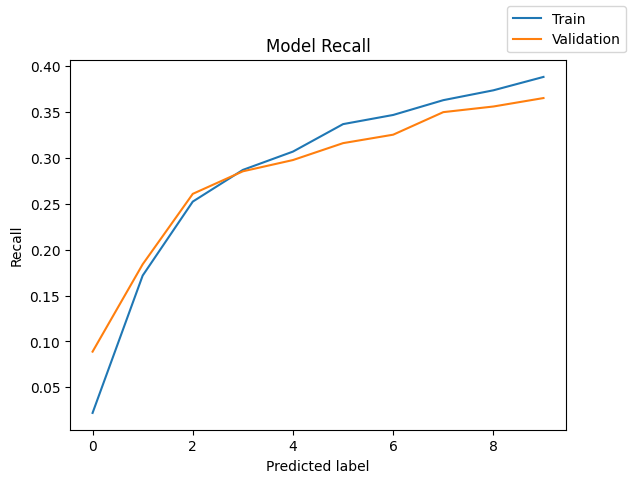

In [78]:

#Plotting loss of train set vs recall of validation set
plot(history1,'loss')
#Plotting recall of train set vs recall of validation set
plot(history1,'recall')


In [79]:
#Predicting the results using best as a threshold
y_train_pred1 = model1.predict(X_train)
y_train_pred1 = (y_train_pred1 > 0.5)
y_train_pred1



200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [80]:
#Predicting the results using best as a threshold
y_val_pred1 = model1.predict(X_val)
y_val_pred1 = (y_val_pred1 > 0.5)
y_val_pred1


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      5096
         1.0       0.77      0.40      0.53      1304

    accuracy                           0.85      6400
   macro avg       0.82      0.69      0.72      6400
weighted avg       0.84      0.85      0.84      6400

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1274
         1.0       0.75      0.37      0.49       326

    accuracy                           0.85      1600
   macro avg       0.80      0.67      0.70      1600
weighted avg       0.83      0.85      0.82      1600



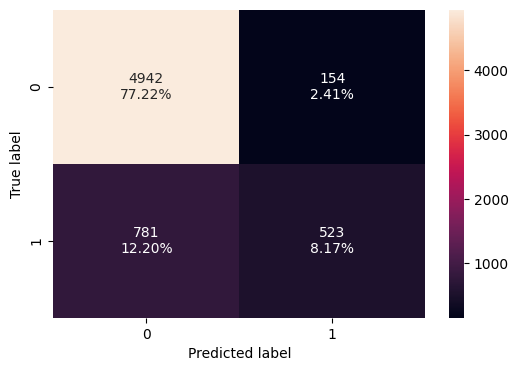

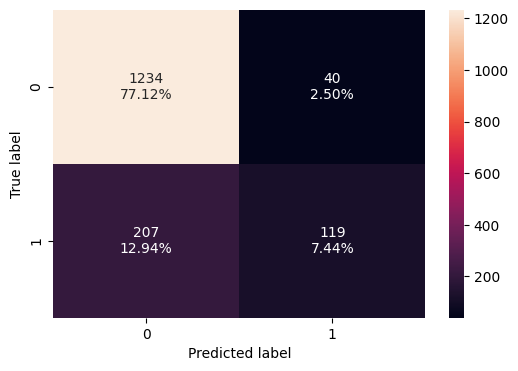

In [81]:
# Add the metrics to the dataframe created earlier
model_name = "NeuralNetwork with Adam optimizer"
train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred1)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred1)
#Classification report
cr = classification_report(y_train, y_train_pred1)
print(cr)
#Classification report
cr = classification_report(y_val, y_val_pred1)
print(cr)
make_confusion_matrix(y_train,y_train_pred1)
make_confusion_matrix(y_val,y_val_pred1)

### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

# defining the dropout ratio
# 0.2 means 20% of the neurons will be switched off
dropout_rate = 0.2

In [ ]:
#Initializing the neural network

model2 = Sequential()
model2.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model2.add(Dropout(dropout_rate))
model2.add(Dense(32,activation="relu"))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["recall"])
model2.summary()

start = time.time()
#Fitting the model with batch_size = 32 and 100 epochs
history2 = model2.fit(X_train,y_train,batch_size=32, epochs=100, verbose=1,validation_data=(X_val,y_val))

end=time.time()
print("Time taken in seconds ",end-start)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,697 (22.25 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5868 - recall: 0.0721 - val_loss: 0.4965 - val_recall: 0.0000e+00
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4859 - recall: 0.0029 - val_loss: 0.4596 - val_recall: 0.0000e+00
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4604 - recall: 0.0336 - val_loss: 0.4370 - val_recall: 0.0494
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4465 - recall: 0.1144 - val_loss: 0.4240 - val_recall: 0.1235
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4354 - recall: 0.1568 - val_loss: 0.4153 - val_recall: 0.1605
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4314 - recall: 0.1901 - val_loss: 0.4110 - val_recall: 0.1605
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4275 - recall: 0.2058 - val_loss: 0.4073 - val_recall: 0.1975
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4231 - recall: 0.2292 - val_loss: 0.4051 - val_recall:

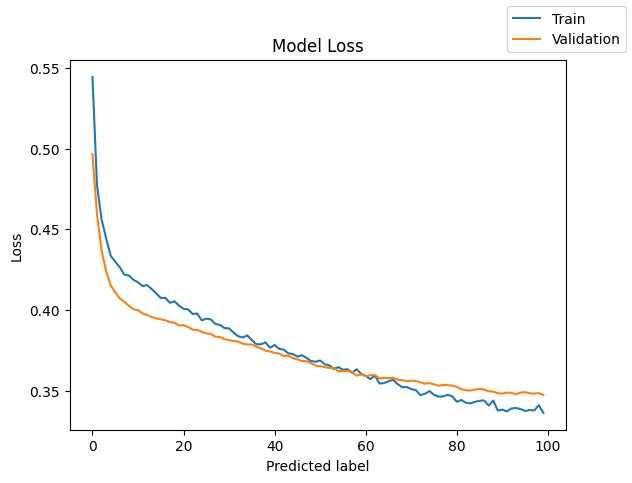

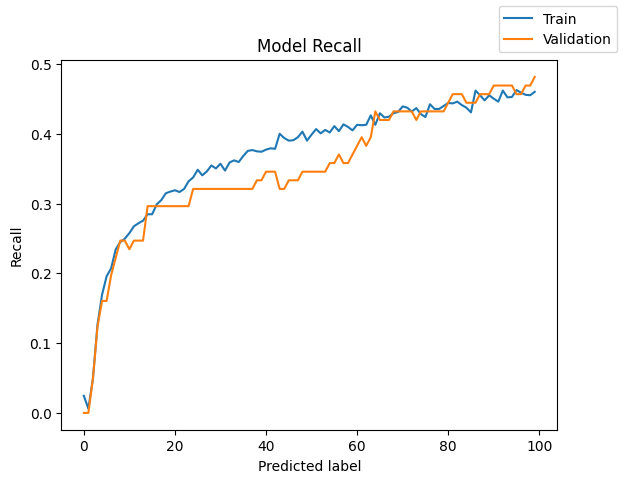

In [ ]:
#Plotting loss of train set vs recall of validation set
plot(history2,'loss')
#Plotting recall of train set vs recall of validation set
plot(history2,'recall')


In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
print(y_train_pred)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ True]
 [False]
 [False]
 ...
 [False]
 [False]
 [ True]]


In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
print(y_val_pred)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ Tru

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      6370
         1.0       0.78      0.47      0.59      1630

    accuracy                           0.87      8000
   macro avg       0.83      0.72      0.75      8000
weighted avg       0.86      0.87      0.85      8000

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       319
         1.0       0.76      0.48      0.59        81

    accuracy                           0.86       400
   macro avg       0.82      0.72      0.76       400
weighted avg       0.86      0.86      0.85       400



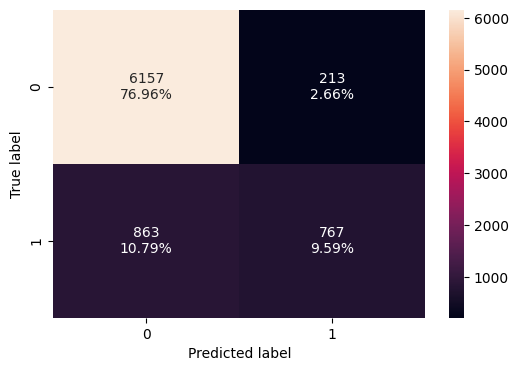

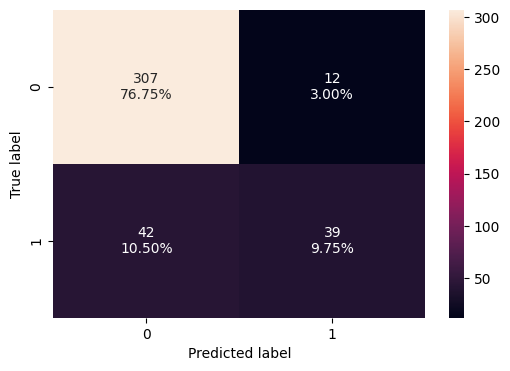

In [ ]:
model_name = "Model with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)


#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
sm = SMOTE(random_state=42)
# Fit SMOTE on the training data.
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (12740, 11)
After UpSampling, the shape of train_y: (12740,) 



In [ ]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the model
model3 = Sequential()
# Add a input layer (specify the # of neurons and activation function)
model3.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
# Add a hidden layer (specify the # of neurons and activation function)
model3.add(Dense(32,activation='relu'))
# Add a hidden layer (specify the # of neurons and activation function)
model3.add(Dense(8,activation='relu'))
# Add the required number of neurons in the output layer with a sigmoid activation function.
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#using SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["recall"])

model3.summary()
start = time.time()
#Fitting the model with batch_size = 32 and 100 epochs
history3 = model3.fit(X_train_smote,y_train_smote,batch_size=32, epochs=100, verbose=1,validation_data=(X_val,y_val))

end=time.time()
print("Time taken in seconds ",end-start)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,937 (23.19 KB)

 Trainable params: 5,937 (23.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7417 - recall: 0.0091 - val_loss: 0.6264 - val_recall: 0.0864
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6976 - recall: 0.0817 - val_loss: 0.6368 - val_recall: 0.1605
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6813 - recall: 0.2127 - val_loss: 0.6390 - val_recall: 0.3457
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6704 - recall: 0.3548 - val_loss: 0.6369 - val_recall: 0.4815
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6604 - recall: 0.4936 - val_loss: 0.6315 - val_recall: 0.5679
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6502 - recall: 0.5773 - val_loss: 0.6229 - val_recall: 0.6420
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6396 - recall: 0.6144 - val_loss: 0.6130 - val_recall: 0.6914
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6287 - recall: 0.6380 - val_loss: 0.6024 - val_recall: 0.7160


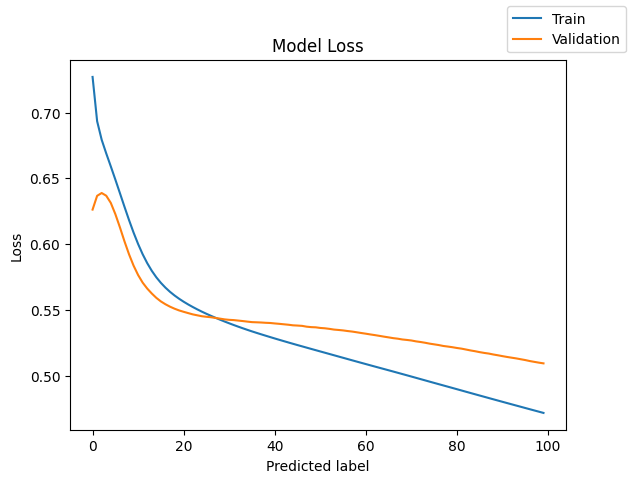

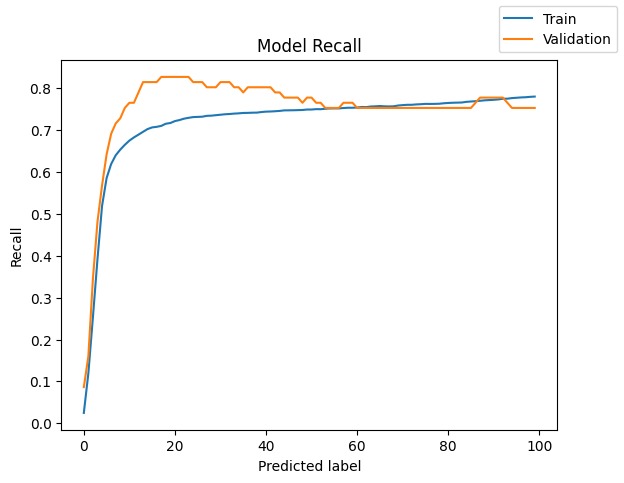

In [ ]:
#Plotting loss of train set vs recall of validation set
plot(history3,'loss')
#Plotting recall of train set vs recall of validation set
plot(history3,'recall')

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model3.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
print(y_train_pred)

399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ True]
 [ True]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
print(y_val_pred)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ Tru

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      6370
         1.0       0.78      0.78      0.78      6370

    accuracy                           0.78     12740
   macro avg       0.78      0.78      0.78     12740
weighted avg       0.78      0.78      0.78     12740

              precision    recall  f1-score   support

         0.0       0.92      0.76      0.84       319
         1.0       0.45      0.75      0.56        81

    accuracy                           0.76       400
   macro avg       0.68      0.76      0.70       400
weighted avg       0.83      0.76      0.78       400



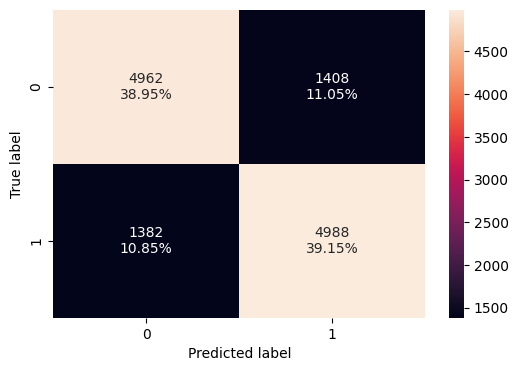

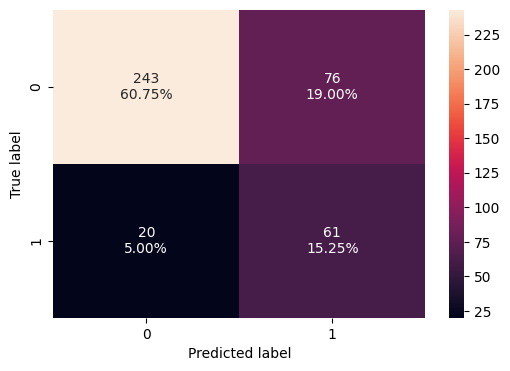

In [ ]:
model_name = "Model with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)


#Calculating the confusion matrix
make_confusion_matrix(y_train_smote,y_train_pred)

#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the model
model4 = Sequential()
# Add a input layer (specify the # of neurons and activation function)
model4.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
# Add a hidden layer (specify the # of neurons and activation function)
model4.add(Dense(32,activation='relu'))
# Add a hidden layer (specify the # of neurons and activation function)
model4.add(Dense(8,activation='relu'))
# Add the required number of neurons in the output layer with a sigmoid activation function.
model4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)
model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["recall"])
model4.summary()
start = time.time()
#Fitting the model with batch_size = 32 and 100 epochs
history4 = model4.fit(X_train_smote,y_train_smote,batch_size=32, epochs=100, verbose=1,validation_data=(X_val,y_val))
end=time.time()
print("Time taken in seconds ",end-start)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,937 (23.19 KB)

 Trainable params: 5,937 (23.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4940 - recall: 0.0773 - val_loss: 0.4092 - val_recall: 0.2346
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4110 - recall: 0.2551 - val_loss: 0.3969 - val_recall: 0.3457
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3931 - recall: 0.3531 - val_loss: 0.3880 - val_recall: 0.3951
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3756 - recall: 0.4014 - val_loss: 0.3780 - val_recall: 0.4444
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3601 - recall: 0.4405 - val_loss: 0.3665 - val_recall: 0.4321
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3467 - recall: 0.4640 - val_loss: 0.3603 - val_recall: 0.4815
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3372 - recall: 0.4706 - val_loss: 0.3556 - val_recall: 0.4938
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3310 - recall: 0.4801 - val_loss: 0.3518 - val_recall: 0.4938


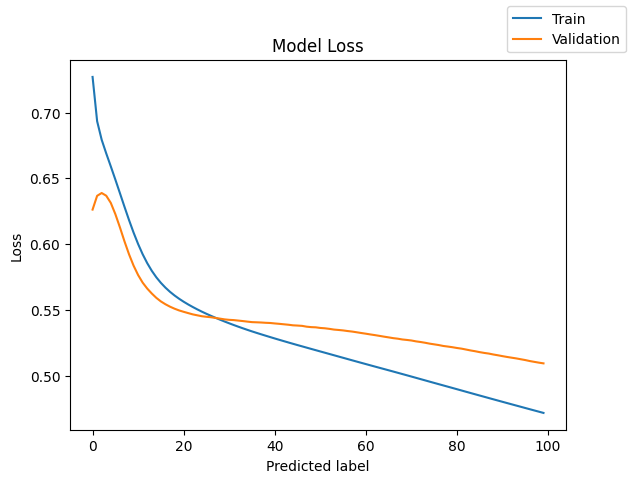

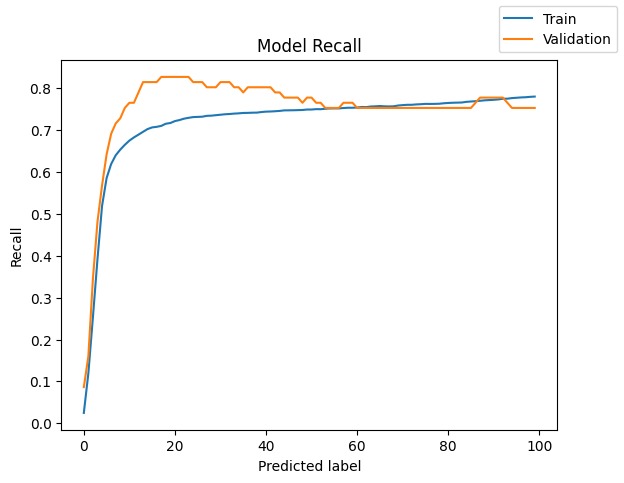

In [ ]:
#Plotting loss of train set vs recall of validation set
plot(history3,'loss')
#Plotting recall of train set vs recall of validation set
plot(history3,'recall')

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model3.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
print(y_train_pred)

399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[ True]
 [ True]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
print(y_val_pred)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ Tru

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      6370
         1.0       0.78      0.78      0.78      6370

    accuracy                           0.78     12740
   macro avg       0.78      0.78      0.78     12740
weighted avg       0.78      0.78      0.78     12740

              precision    recall  f1-score   support

         0.0       0.92      0.76      0.84       319
         1.0       0.45      0.75      0.56        81

    accuracy                           0.76       400
   macro avg       0.68      0.76      0.70       400
weighted avg       0.83      0.76      0.78       400



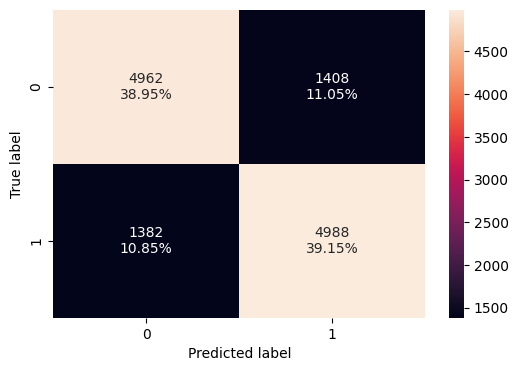

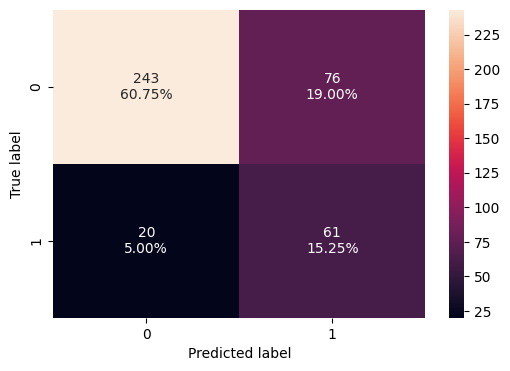

In [ ]:
model_name = "Model with SMOTE & Adam"
train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)
#classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)

#Calculating the confusion matrix
make_confusion_matrix(y_train_smote,y_train_pred)
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the model
model5 = Sequential()
# Add a input layer (specify the # of neurons and activation function)
model5.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
model5.add(Dropout(dropout_rate))
# Add a hidden layer (specify the # of neurons and activation function)
model5.add(Dense(32,activation='relu'))
# Add a hidden layer (specify the # of neurons and activation function)
model5.add(Dense(8,activation='relu'))
# Add the required number of neurons in the output layer with a sigmoid activation function.
model5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)
model5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["recall"])
model5.summary()
start = time.time()
#Fitting the model with batch_size = 32 and 100 epochs
history5 = model5.fit(X_train_smote,y_train_smote,batch_size=32, epochs=100, verbose=1,validation_data=(X_val,y_val))
end=time.time()
print("Time taken in seconds ",end-start)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,937 (23.19 KB)

 Trainable params: 5,937 (23.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.5963 - recall: 0.6978 - val_loss: 0.4983 - val_recall: 0.7654
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5060 - recall: 0.7429 - val_loss: 0.4617 - val_recall: 0.7284
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4703 - recall: 0.7663 - val_loss: 0.4398 - val_recall: 0.7037
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4476 - recall: 0.7807 - val_loss: 0.4423 - val_recall: 0.7284
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4354 - recall: 0.7898 - val_loss: 0.4330 - val_recall: 0.6914
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4237 - recall: 0.8029 - val_loss: 0.4454 - val_recall: 0.7037
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4141 - recall: 0.8065 - val_loss: 0.4351 - val_recall: 0.6790
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4081 - recall: 0.8055 - val_loss: 0.4479 - val_recall: 0.7037


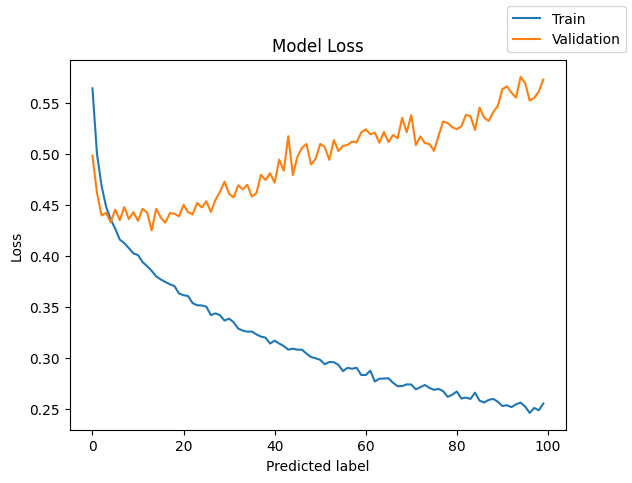

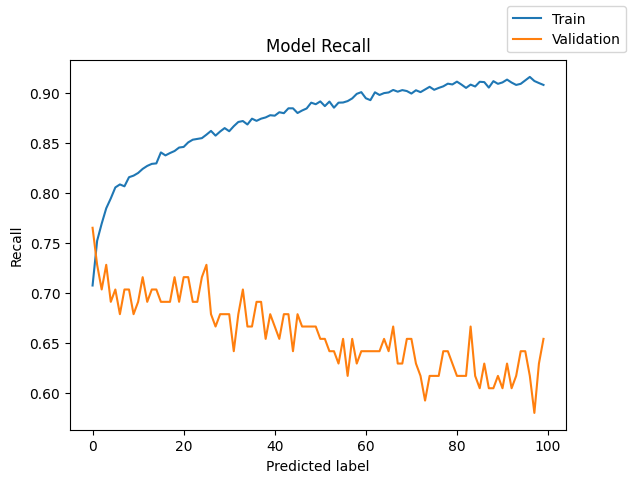

In [ ]:
#Plotting loss of train set vs recall of validation set
plot(history5,'loss')
#Plotting recall of train set vs recall of validation set
plot(history5,'recall')

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model5.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
print(y_train_pred)

399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]


In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
print(y_val_pred)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ Tru

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      6370
         1.0       0.92      0.95      0.94      6370

    accuracy                           0.93     12740
   macro avg       0.94      0.93      0.93     12740
weighted avg       0.94      0.93      0.93     12740

              precision    recall  f1-score   support

         0.0       0.92      0.76      0.84       319
         1.0       0.45      0.75      0.56        81

    accuracy                           0.76       400
   macro avg       0.68      0.76      0.70       400
weighted avg       0.83      0.76      0.78       400



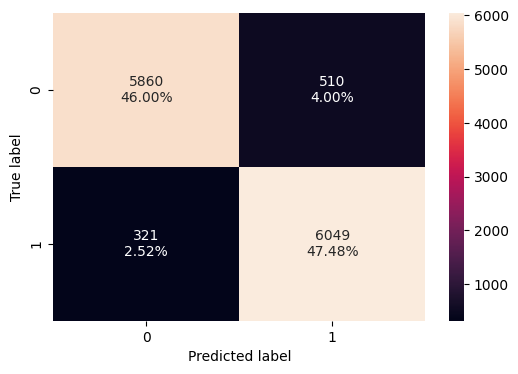

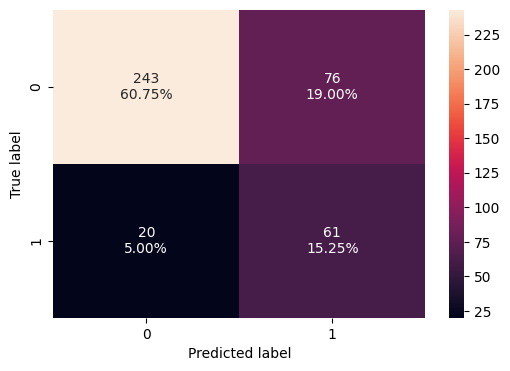

In [ ]:
model_name = "Model with SMOTE & SGD"
train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)
#classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote,y_train_pred)
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NeuralNetwork with SGD optimizer,0.243558
NeuralNetwork with Adam optimizer,0.747239
Model with Adam & Dropout,0.470552
Model with SMOTE & SGD,0.949608
Model with SMOTE & Adam,0.783046


In [ ]:
print("Validation performance comparison")
valid_metric_df

Validation performance comparison


,recall
NeuralNetwork with SGD optimizer,0.185185
NeuralNetwork with Adam optimizer,0.580247
Model with Adam & Dropout,0.481481
Model with SMOTE & SGD,0.753086
Model with SMOTE & Adam,0.753086


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ True]
 [False]
 [False]
 ...
 [ True]
 [False]
 [ True]]
              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85      1274
         1.0       0.47      0.74      0.57       326

    accuracy                           0.77      1600
   macro avg       0.69      0.76      0.71      1600
weighted avg       0.83      0.77      0.79      1600



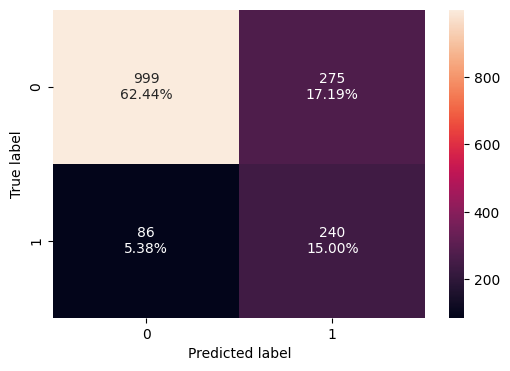

In [ ]:
y_test_pred = model3.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

#classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

#Plot the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___